<a href="https://colab.research.google.com/github/khaledAyoub/NlpTwitterTask/blob/main/NLP_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Lab Task — Preprocessing to Deployment with Twitter Sentiment Dataset

## Overview

This lab takes students through the **entire NLP pipeline** using a **Twitter Sentiment Analysis dataset** (tweets labeled as positive, negative, or neutral). Students will preprocess the data, represent it using multiple methods, train classical machine learning models, evaluate their results, and finally build a small API for deployment.

---

## Learning Objectives

* Apply text preprocessing (regex, case folding, tokenization, stopword removal, punctuation handling).
* Compare stemming and lemmatization, and use POS tagging to analyze counts of nouns, verbs, and adjectives.
* Build text representations using **Bag-of-Words**, **TF–IDF**, and **Word2Vec**.
* Train classical ML models inside an sklearn **Pipeline**.
* Evaluate models with standard metrics and perform basic error analysis.
* Save a trained pipeline and build a simple API to serve predictions.

---

## Dataset

We will use the **Sentiment140 Twitter dataset** (1.6M tweets, labeled positive/negative). For simplicity, you can work with a smaller balanced subset (e.g., 10k–20k tweets). This dataset is widely used for sentiment analysis and contains real, noisy text with mentions, hashtags, and emoticons.

Dataset link: [Sentiment140](http://help.sentiment140.com/for-students/)

---

## Step-by-Step Tasks

### 1) Exploratory Data Analysis (EDA)

* Load dataset, show class distribution, tweet length histogram, and a few sample tweets.
* Deliverable: 3 plots (class balance, length histogram, top frequent tokens) + 5 example tweets.

### 2) Regex Cleaning

* Remove URLs, mentions (@user), hashtags, emojis (or replace with tokens), and extra whitespace.
* Show a before-and-after example for at least 3 tweets.

### 3) Case Folding & Tokenization

* Convert all text to lowercase.
* Tokenize tweets using NLTK or spaCy.
* Compare vocabulary size before and after cleaning.

### 4) Stopwords, Punctuation, and Numbers

* Remove stopwords (with NLTK list, customizable).
* Decide how to handle punctuation and numbers (remove or replace with `<NUM>`).
* Deliverable: short explanation of your choice.

### 5) Stemming vs Lemmatization

* Use PorterStemmer (stemming) and spaCy lemmatizer.
* Show 20 sample words with their stem vs lemma.
* Train quick models with both and compare results.

### 6) POS Tagging (extra features)

* Use spaCy to count nouns, verbs, and adjectives per tweet.
* Add these counts as additional numeric features.
* Compare model with vs without POS features.

### 7) Text Representation

* Implement three representations:
  1. **Bag-of-Words** (CountVectorizer)
  2. **TF–IDF** (TfidfVectorizer)
  3. **Word2Vec** (pretrained embeddings, averaged per tweet)
* Compare vocabulary sizes and representation dimensions.

### 8) Modeling with Pipelines

* Use sklearn Pipelines to connect preprocessing + vectorizer + classifier.
* Models to try:
  * Multinomial Naive Bayes (for BoW/TF–IDF)
  * Logistic Regression
  * Linear SVM
* Deliverable: comparison table (accuracy, F1-score).

### 9) Evaluation & Error Analysis

* Use held-out test set.
* Metrics: accuracy, precision, recall, F1, confusion matrix.
* Show 10 misclassified tweets and discuss why they may be difficult.

### 10) Save Model Pipeline

* Save the best pipeline using `joblib` or `pickle`.
* Deliverable: `sentiment_model.pkl` file.

### 11) Build a Simple API (Deployment Step)

* Create a small Flask API with one endpoint `/predict` that accepts a tweet as input and returns sentiment prediction.
* The API should load the saved pipeline and make predictions.
* Deliverable: `app.py` with Flask code + test with a sample curl or Postman request.

---

## Deliverables

1. Jupyter Notebook with step-by-step tasks, results, and code.
2. Comparison tables for preprocessing choices and representations.
3. Saved pipeline file (`.pkl`).
4. Flask API script (`app.py`).
5. Short report in markdown cell summarizing preprocessing, modeling choices, and results.

---

This streamlined lab ensures students get hands-on experience with **real-world text preprocessing, classical modeling, and deployment of NLP systems**.


### 1. Load the Dataset

We will use the **Sentiment140 Twitter Sentiment dataset**.  
It contains 1.6 million tweets labeled as positive (4) or negative (0).  
For this lab, we will load a smaller subset (e.g., 20,000 rows) for faster experimentation.

```python
import pandas as pd

# Column order for Sentiment140 dataset:
# 0 - target (0 = negative, 4 = positive)
# 1 - ids
# 2 - date
# 3 - flag
# 4 - user
# 5 - text (tweet)

# Update the file path if needed
file_path = "sentiment140.csv"

# Load with proper encoding
df = pd.read_csv(file_path, encoding='latin-1', header=None)

# Assign column names
df.columns = ["target", "id", "date", "flag", "user", "text"]

# Map target labels: 0 → negative, 4 → positive
df["target"] = df["target"].map({0: "negative", 4: "positive"})

# Take a smaller sample for experiments (optional)
df = df.sample(20000, random_state=42).reset_index(drop=True)

# Quick check
print(df.shape)
df.head()


In [1]:
import pandas as pd

import pandas as pd
import zipfile
import os
import requests

# Step 1: Download the dataset (if not already downloaded)
url = "https://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip"
zip_path = "trainingandtestdata.zip"

if not os.path.exists(zip_path):
    print("Downloading dataset...")
    r = requests.get(url)
    with open(zip_path, "wb") as f:
        f.write(r.content)

# Step 2: Unzip the file
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(".")

# Step 3: Load training data
file_path = "training.1600000.processed.noemoticon.csv"

df = pd.read_csv(file_path, encoding="latin-1", header=None)
df.columns = ["target", "id", "date", "flag", "user", "text"]

# Map sentiment labels: 0 = negative, 4 = positive
df["target"] = df["target"].map({0: "negative", 4: "positive"})

# Optional: sample a smaller dataset for quicker experiments
df = df.sample(20000, random_state=42).reset_index(drop=True)

# Preview the data
print(df.shape)
df.head()


# Load training set
train_path = "training.1600000.processed.noemoticon.csv"
train_df = pd.read_csv(train_path, encoding="latin-1", header=None)
train_df.columns = ["target", "id", "date", "flag", "user", "text"]
train_df["target"] = train_df["target"].map({0: "negative", 4: "positive"})

print("Training set:", train_df.shape)
print(train_df.head())

# Load manual test set
test_path = "testdata.manual.2009.06.14.csv"
test_df = pd.read_csv(test_path, encoding="latin-1", header=None)
test_df.columns = ["target", "id", "date", "flag", "user", "text"]

# This test set has labels 0 (negative), 2 (neutral), 4 (positive)
test_df["target"] = test_df["target"].map({0: "negative", 2: "neutral", 4: "positive"})

print("Test set:", test_df.shape)
print(test_df.head())


(20000, 6)
Training set: (1600000, 6)
     target          id                          date      flag  \
0  negative  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1  negative  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2  negative  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3  negative  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4  negative  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  
Test set: (498, 6)
     target  id                          date     flag      user  \
0  positive   3  Mon May 11 03:17:40 UTC

In [2]:
df = test_df

In [3]:
df


,target,id,date,flag,user,text
0,positive,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,positive,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,positive,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,positive,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,positive,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...
...,...,...,...,...,...,...
493,neutral,14072,Sun Jun 14 04:31:43 UTC 2009,latex,proggit,Ask Programming: LaTeX or InDesign?: submitted...
494,negative,14073,Sun Jun 14 04:32:17 UTC 2009,latex,sam33r,"On that note, I hate Word. I hate Pages. I hat..."
495,positive,14074,Sun Jun 14 04:36:34 UTC 2009,latex,iamtheonlyjosie,Ahhh... back in a *real* text editing environm...
496,negative,14075,Sun Jun 14 21:36:07 UTC 2009,iran,plutopup7,"Trouble in Iran, I see. Hmm. Iran. Iran so far..."


#EDA

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re


/tmp/ipython-input-478965437.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target", data=df, palette="Set2")


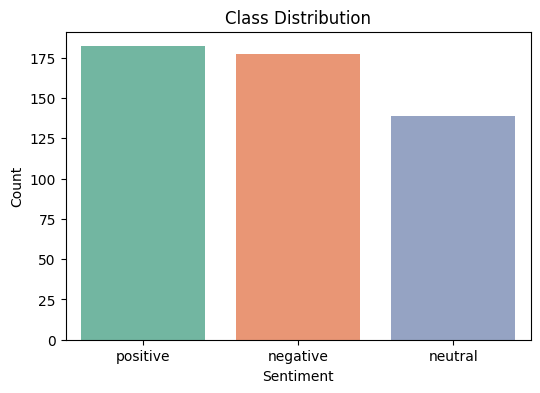

In [5]:
#Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="target", data=df, palette="Set2")
plt.title("Class Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

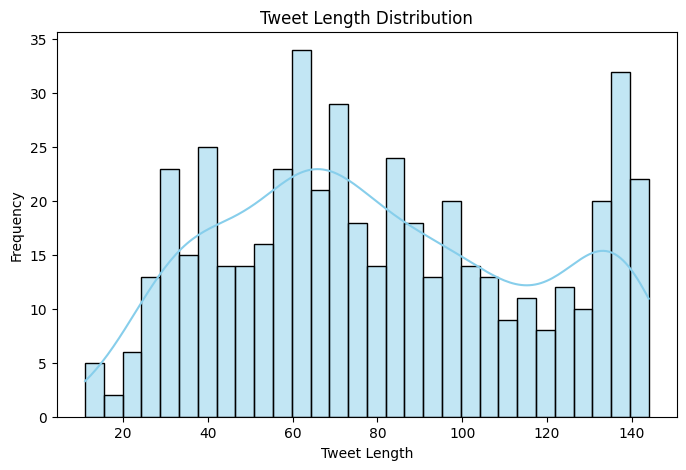

In [6]:
# Tweet Length Histogram
df['tweet_length'] = df['text'].apply(len)
plt.figure(figsize=(8,5))
sns.histplot(df['tweet_length'], bins=30, kde=True, color="skyblue")
plt.title("Tweet Length Distribution")
plt.xlabel("Tweet Length")
plt.ylabel("Frequency")
plt.show()

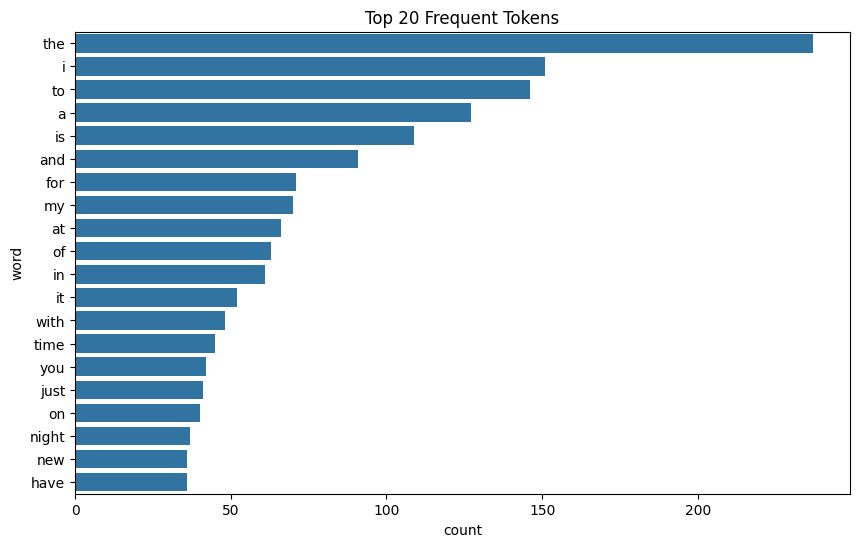

In [7]:
# Top Frequent Tokens
def clean_text(text):
  text = re.sub(r"http\S+", "", text)
  text = re.sub(r"@\w+", "", text)
  text = re.sub(r"[^a-zA-Z\s]", "", text)
  return text.lower()
all_words = " ".join(df['text'].apply(clean_text))
word_counts = Counter(all_words.split())
common_words = pd.DataFrame(word_counts.most_common(20), columns=["word", "count"])
plt.figure(figsize=(10,6))
sns.barplot(x="count", y="word", data=common_words)
plt.title("Top 20 Frequent Tokens")
plt.show()

In [8]:
# Display 5 Example Tweets
df[['target', 'user', 'text']].sample(5, random_state=42)

,target,user,text
487,positive,JimFacey,getting ready to test out some burger receipes...
73,positive,PRolivia,Back when I worked for Nike we had one fav wor...
231,negative,chelseabot,"@MMBarnhill yay, glad you got the phone! Still..."
175,neutral,neeeelia,waiting in line at safeway.
237,positive,jhall515,reading on my new Kindle2!


# Regex Cleaning

In [9]:
def clean_tweet(text):
    text = re.sub(r"http\S+", "", text)           # remove URLs
    text = re.sub(r"@\w+", "", text)              # remove mentions
    text = re.sub(r"#\w+", "", text)              # remove hashtags
    text = re.sub(r"[^\w\s]", "", text)           # remove emojis/special chars
    text = re.sub(r"\s+", " ", text).strip()      # remove extra whitespace
    return text.lower()

df['text'] = df['text'].apply(clean_tweet)

# Show before and after for 3 tweets
sample_df = df[['text']].sample(3, random_state=42).copy()
sample_df['cleaned_text'] = sample_df['text'].apply(clean_tweet)
sample_df

,text,cleaned_text
487,getting ready to test out some burger receipes...,getting ready to test out some burger receipes...
73,back when i worked for nike we had one fav wor...,back when i worked for nike we had one fav wor...
231,yay glad you got the phone still damn you atampt,yay glad you got the phone still damn you atampt


In [10]:
!pip install nltk
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string



nltk.download('stopwords')
nltk.download('punkt')
print("Hello world!")



Hello world!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Case Folding & Tokenization

In [11]:
df['text'] = df['text'].str.lower()
df['tokens'] = df['text'].apply(word_tokenize)

vocab_before = set(" ".join(df['text']).split())
vocab_after = set([tok for tokens in df['tokens'] for tok in tokens])

print("Vocabulary size before tokenization:", len(vocab_before))
print("Vocabulary size after tokenization:", len(vocab_after))

# Show example tokenized tweets
df[['text', 'tokens']].sample(5,random_state=42)

Vocabulary size before tokenization: 2031
Vocabulary size after tokenization: 2031


,text,tokens
487,getting ready to test out some burger receipes...,"[getting, ready, to, test, out, some, burger, ..."
73,back when i worked for nike we had one fav wor...,"[back, when, i, worked, for, nike, we, had, on..."
231,yay glad you got the phone still damn you atampt,"[yay, glad, you, got, the, phone, still, damn,..."
175,waiting in line at safeway,"[waiting, in, line, at, safeway]"
237,reading on my new kindle2,"[reading, on, my, new, kindle2]"


# Stopwords, Punctuation, and Numbers

In [12]:
stop_words = set(stopwords.words('english'))

def clean_tokens(tokens):
    cleaned = []
    for tok in tokens:
        if tok in stop_words:
            continue
        elif tok.isnumeric():
            cleaned.append("<NUM>")
        elif tok in string.punctuation:
            continue
        else:
            cleaned.append(tok)
    return cleaned

df['tokens'] = df['tokens'].apply(clean_tokens)
df[['text', 'tokens']].sample(5,random_state=42)

,text,tokens
487,getting ready to test out some burger receipes...,"[getting, ready, test, burger, receipes, weeke..."
73,back when i worked for nike we had one fav wor...,"[back, worked, nike, one, fav, word]"
231,yay glad you got the phone still damn you atampt,"[yay, glad, got, phone, still, damn, atampt]"
175,waiting in line at safeway,"[waiting, line, safeway]"
237,reading on my new kindle2,"[reading, new, kindle2]"


# Stemming vs Lemmatization

In [13]:
from nltk.stem import PorterStemmer
import spacy
nlp = spacy.load("en_core_web_sm", disable=["parser","ner"])


In [14]:
# Pick 20 sample word
sample_tokens = [tok for tokens in df['tokens'] for tok in tokens]
sample_words = pd.Series(sample_tokens).drop_duplicates().sample(20, random_state=42).tolist()
sample_words


['monsta',
 'arrival',
 'york',
 'far',
 'funding',
 'braindead',
 'goodby',
 'graphics',
 'u',
 'dad',
 'spent',
 'wdsugm',
 'code',
 'dump',
 'grill',
 'mistake',
 'bio',
 'muppet',
 'pay',
 'chief']

In [15]:

# Step 2: Compare stems vs lemmas for those words
stemmer = PorterStemmer()
comparison = []
for word in sample_words:
    stem = stemmer.stem(word)
    lemma = nlp(word)[0].lemma_
    comparison.append((word, stem, lemma))

pd.DataFrame(comparison, columns=["Word", "Stem", "Lemma"])


,Word,Stem,Lemma
0,monsta,monsta,monsta
1,arrival,arriv,arrival
2,york,york,york
3,far,far,far
4,funding,fund,fund
5,braindead,braindead,braindead
6,goodby,goodbi,goodby
7,graphics,graphic,graphic
8,u,u,u
9,dad,dad,dad


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [17]:
# Apply stemming to dataset
df['stemmed'] = df['tokens'].apply(lambda tokens: " ".join([stemmer.stem(t) for t in tokens]))
df[['text', 'stemmed']].sample(5,random_state=42)

,text,stemmed
487,getting ready to test out some burger receipes...,get readi test burger receip weekend bobbi fla...
73,back when i worked for nike we had one fav wor...,back work nike one fav word
231,yay glad you got the phone still damn you atampt,yay glad got phone still damn atampt
175,waiting in line at safeway,wait line safeway
237,reading on my new kindle2,read new kindle2


In [18]:

# Apply lemmatization to dataset
def lemmatize_tokens(tokens):
    doc = nlp(" ".join(tokens))
    return " ".join([token.lemma_ for token in doc])

df['lemmatized'] = df['tokens'].apply(lemmatize_tokens)
df[['text', 'lemmatized']].sample(5,random_state=42)



,text,lemmatized
487,getting ready to test out some burger receipes...,get ready test burger receipe weekend bobby fl...
73,back when i worked for nike we had one fav wor...,back work nike one fav word
231,yay glad you got the phone still damn you atampt,yay glad get phone still damn atampt
175,waiting in line at safeway,wait line safeway
237,reading on my new kindle2,read new kindle2


In [19]:

# Train model with stemming
X_train, X_test, y_train, y_test = train_test_split(
    df['stemmed'], df['target'], test_size=0.2, random_state=42
)

vec = CountVectorizer()
X_train_stem = vec.fit_transform(X_train)
X_test_stem = vec.transform(X_test)

model_stem = LogisticRegression(max_iter=1000)
model_stem.fit(X_train_stem, y_train)

acc_stem = accuracy_score(y_test, model_stem.predict(X_test_stem))
print("Accuracy (Stemming):", acc_stem)

Accuracy (Stemming): 0.61


In [20]:
# Train model with lemmatization
X_train, X_test, y_train, y_test = train_test_split(
    df['lemmatized'], df['target'], test_size=0.2, random_state=42
)

vec = CountVectorizer()
X_train_lemma = vec.fit_transform(X_train)
X_test_lemma = vec.transform(X_test)

model_lemma = LogisticRegression(max_iter=1000)
model_lemma.fit(X_train_lemma, y_train)

acc_lemma = accuracy_score(y_test, model_lemma.predict(X_test_lemma))
print("Accuracy (Lemmatization):", acc_lemma)

Accuracy (Lemmatization): 0.61


# POS Tagging (extra features)

In [21]:
def pos_features(text):
    doc = nlp(text)
    nouns = sum(1 for token in doc if token.pos_ == "NOUN")
    verbs = sum(1 for token in doc if token.pos_ == "VERB")
    adjs  = sum(1 for token in doc if token.pos_ == "ADJ")
    return nouns, verbs, adjs

# Apply to dataset
df[['noun_count', 'verb_count', 'adj_count']] = df['text'].apply(
    lambda x: pd.Series(pos_features(x))
)

# Show sample with new features
df[['text', 'noun_count', 'verb_count', 'adj_count']].head(5)

,text,noun_count,verb_count,adj_count
0,i loooooooovvvvvveee my kindle2 not that the d...,2,1,3
1,reading my kindle2 love it lee childs is good ...,4,1,1
2,ok first assesment of the it fucking rocks,3,1,1
3,youll love your kindle2 ive had mine for a few...,6,3,4
4,fair enough but i have the kindle2 and i think...,1,1,2


# Text Representation

In [25]:
# !pip install gensim

In [42]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Bag-of-Words
count_vec = CountVectorizer()
X_bow = count_vec.fit_transform(df['lemmatized'])

print("Bag-of-Words Vocabulary Size:", len(count_vec.vocabulary_))
print("BoW Representation Shape:", X_bow.shape)

# TF-IDF
tfidf_vec = TfidfVectorizer()
X_tfidf = tfidf_vec.fit_transform(df['lemmatized'])

print("TF-IDF Vocabulary Size:", len(tfidf_vec.vocabulary_))
print("TF-IDF Representation Shape:", X_tfidf.shape)

# Summary Comparison
print("=== Representation Summary ===")
print("Bag-of-Words:", X_bow.shape)
print("TF-IDF:", X_tfidf.shape)

Bag-of-Words Vocabulary Size: 1666
BoW Representation Shape: (498, 1666)
TF-IDF Vocabulary Size: 1666
TF-IDF Representation Shape: (498, 1666)
=== Representation Summary ===
Bag-of-Words: (498, 1666)
TF-IDF: (498, 1666)


In [27]:
!pip install --upgrade smart_open